In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
DESIRED_ACCURACY = 0.998
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') >= DESIRED_ACCURACY:
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True

In [0]:
# loading fashion mnist dataset from the keras library
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# Reshaping the images
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

training_labels=tf.keras.utils.to_categorical(training_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)
# Normalization
training_images = training_images / 255.
test_images = test_images / 255.

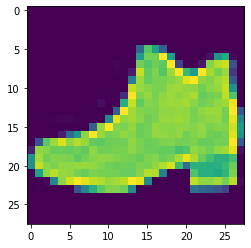

In [0]:
image_index = 15
#plt.title("Class: {}".format(class_names[training_labels[image_index].squeeze()]))
plt.imshow(training_images[image_index].squeeze())
plt.show()

In [0]:
callbacks = myCallBack()

TRAINING THE MODEL

In [0]:
# Creating the model
model = tf.keras.models.Sequential([
    # Convolutional layer 1
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    # Pooling layer 1
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),       # 128 neurons in the dense hidden layer
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)     # 10 neurons in the output layer
])

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images,training_labels,epochs = 10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3713 - accuracy: 0.8677
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2517 - accuracy: 0.9091
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2049 - accuracy: 0.9246
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1703 - accuracy: 0.9373
Epoch 5/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.1449 - accuracy: 0.9451
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1208 - accuracy: 0.9555
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0987 - accuracy: 0.9642
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0830 - accuracy: 0.9693
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0676 - accuracy: 0.9751
Epoch 10/10
1875/1875 [==============================] - 57s 30m

In [0]:
loss, accuracy =model.evaluate(test_images,test_labels,verbose=0)
print('Accuracy: {}'.format(accuracy))
print('Loss: {}'.format(loss))

Accuracy: 0.9156000018119812
Loss: 0.34727171063423157
